### This notebook contains worked examples from Chapter 3 of the text *Analytic Combinatorics in Several Variables (2nd edition)* by Pemantle, Wilson and Melczer. 

Further details can be found on the book website at [https://acsvproject.com/acsvbook/](https://acsvproject.com/acsvbook/) .

Example numbers match the published version.

In [1]:
# MAKE SURE TO RUN THIS CELL!
var('w x y z r s i j')

(w, x, y, z, r, s, i, j)

### Asymptotic Expansions in Sage

In [2]:
# Sage has good built-in support for (univariate) asymptotics through the AsymptoticRing structure
SCR = SR.subring(no_variables=True) # Create symbolic ring with no variables
A.<n> = AsymptoticRing(
    growth_group='QQ^n * n^QQ * log(n)^QQ', 
    coefficient_ring=SCR,
    default_prec=4
)
A

Asymptotic Ring <QQ^n * n^QQ * log(n)^QQ * Signs^n> over Symbolic Constants Subring

In [3]:
# When n generates an AsymptoticRing, Sage automatically computes expansions
show(SR("sqrt(1+n)"), " = \t", sqrt(1+n))
show(SR("(1+1/n)^n"), " = \t", (1+1/n)^n)
show(SR("log(1+n)"), " = \t", log(1+n))

sqrt(n + 1) ' = \t' n^(1/2) + 1/2*n^(-1/2) - 1/8*n^(-3/2) + 1/16*n^(-5/2) + O(n^(-7/2))

(1/n + 1)^n ' = \t' e - 1/2*e*n^(-1) + 11/24*e*n^(-2) - 7/16*e*n^(-3) + O(n^(-4))

log(n + 1) ' = \t' log(n) + n^(-1) - 1/2*n^(-2) + 1/3*n^(-3) - 1/4*n^(-4) + O(n^(-5))

In [4]:
# The package can compute asymptotic expansions of meromorphic functions from its singularities
# using the results discussed in this chapter
def GF(z):
    return 1/((1-2*z)^2*(1+z))

asm = A.coefficients_of_generating_function(
    function=GF,
    singularities=(1/2,),
    precision=3
)
show("[z^n]", SR("1/((1-2*z)^2*(1+z))"), " = \t", asm)

'[z^n]' 1/((2*z - 1)^2*(z + 1)) ' = \t' 2/3*2^n*n + 8/9*2^n + O(2^n*n^(-2))

In [5]:
# It can also compute expansions near logarithmic and algebraic singularities using transfer theorems
def harmonic(z):
    return - log(1 - z) / (1 - z)

asm = A.coefficients_of_generating_function(
    function=harmonic,
    singularities=(1,),
    precision=10
)
show("[z^n]", SR("- log(1 - z) / (1 - z)"), " = \t", asm)


def catalan(z):
    return (1-sqrt(1-4*z))/(2*z)
asm = A.coefficients_of_generating_function(
    function=catalan,
    singularities=(1/4,),
    precision=3
)
show("[z^n]", SR("(1-sqrt(1-4*z))/(2*z)"), " = \t", asm)

'[z^n]' log(-z + 1)/(z - 1) ' = \t' log(n) + euler_gamma + 1/2*n^(-1) - 1/12*n^(-2) + 1/120*n^(-4) + O(n^(-5)*log(n))

'[z^n]' -1/2*(sqrt(-4*z + 1) - 1)/z ' = \t' 1/sqrt(pi)*4^n*n^(-3/2) - 9/8/sqrt(pi)*4^n*n^(-5/2) + 145/128/sqrt(pi)*4^n*n^(-7/2) + O(4^n*n^(-4))

### Partial Fractions and Residues

In [6]:
# Sage can compute partial fraction decompositions for rational functions
F = (3*z+4)/(-6*z^5 + 13*z^4 - 4*z^3 - 6*z^2 + 2*z + 1)
show(F, " = \t", F.partial_fraction())

-(3*z + 4)/(6*z^5 - 13*z^4 + 4*z^3 + 6*z^2 - 2*z - 1) ' = \t' 243/64/(3*z + 1) - 40/27/(2*z + 1) - 907/1728/(z - 1) + 83/144/(z - 1)^2 - 7/12/(z - 1)^3

In [7]:
# It can also compute residues
F = tan(z)
show("The residue of \t", F, " at z = pi/2 is", F.residue(z==pi/2))

'The residue of \t' tan(z) ' at z = pi/2 is' -1

### Example 3.8 - Surjections

In [8]:
# Note that Sage does not know there is an exponentially smaller error
def surjection(z):
    return 1/(2-exp(z))

asm = A.coefficients_of_generating_function(
    function=surjection,
    singularities=(log(2),),
    precision=10
)
show("[z^n]", SR("1/(2-exp(z))"), " = \t", asm)

'[z^n]' -1/(e^z - 2) ' = \t' 1/2/log(2)*(1/log(2))^n + O((1/log(2))^n*n^(-9))

### Lemma 3.10 - Basic Scale

In [9]:
# These asymptotic expansions can be computed automatically in Sage
def algsing(z):
    return (1-z)^(-3/2)

asm = A.coefficients_of_generating_function(
    function=algsing,
    singularities=(1,),
    precision=10
)
show("[z^n]", SR("(1-z)^(-3/2)"), " = \t", asm)

'[z^n]' (-z + 1)^(-3/2) ' = \t' 2/sqrt(pi)*n^(1/2) + 3/4/sqrt(pi)*n^(-1/2) - 7/64/sqrt(pi)*n^(-3/2) + 9/512/sqrt(pi)*n^(-5/2) + 59/16384/sqrt(pi)*n^(-7/2) - 483/131072/sqrt(pi)*n^(-9/2) - 2323/2097152/sqrt(pi)*n^(-11/2) + 42801/16777216/sqrt(pi)*n^(-13/2) + 923923/1073741824/sqrt(pi)*n^(-15/2) - 30055311/8589934592/sqrt(pi)*n^(-17/2) + O(n^(-19/2))

### Example 3.11 - Darboux Example

In [10]:
# These asymptotic expansions can be computed automatically in Sage
def EvenCycles(z):
    return exp(-z/2)/sqrt(1-z)

asm = A.coefficients_of_generating_function(
    function=EvenCycles,
    singularities=(1,),
    precision=3
)
show("[z^n]", SR("exp(-z/2)/sqrt(1-z)"), " = \t", asm)

'[z^n]' e^(-1/2*z)/sqrt(-z + 1) ' = \t' (e^(-1/2)/sqrt(pi))*n^(-1/2) + (-3/8*e^(-1/2)/sqrt(pi))*n^(-3/2) + (1/128*e^(-1/2)/sqrt(pi))*n^(-5/2) + O(n^(-7/2))

### Example 3.13 - 2-Regular Graphs

In [11]:
# These asymptotic expansions can be computed automatically in Sage
def TwoRegular(z):
    return exp(-z/2-z^2/4)/sqrt(1-z)

asm = A.coefficients_of_generating_function(
    function=TwoRegular,
    singularities=(1,),
    precision=3
)
show("[z^n]", SR("exp(-z/2)/sqrt(1-z)"), " = \t", asm)

'[z^n]' e^(-1/2*z)/sqrt(-z + 1) ' = \t' (e^(-3/4)/sqrt(pi))*n^(-1/2) + (-5/8*e^(-3/4)/sqrt(pi))*n^(-3/2) + (1/128*e^(-3/4)/sqrt(pi))*n^(-5/2) + O(n^(-7/2))

### Example 3.16 - Catalan Numbers

In [12]:
# Copied from above
def catalan(z):
    return (1-sqrt(1-4*z))/(2*z)

asm = A.coefficients_of_generating_function(
    function=catalan,
    singularities=(1/4,),
    precision=3
)
show("[z^n]", SR("(1-sqrt(1-4*z))/(2*z)"), " = \t", asm)

'[z^n]' -1/2*(sqrt(-4*z + 1) - 1)/z ' = \t' 1/sqrt(pi)*4^n*n^(-3/2) - 9/8/sqrt(pi)*4^n*n^(-5/2) + 145/128/sqrt(pi)*4^n*n^(-7/2) + O(4^n*n^(-4))

### Example 3.18 - Ordered Set Partitions

In [13]:
var('n')
F = exp(z/(1-z))
coeffs = list(F.series(z,100).truncate().polynomial(QQ))
asm = n^(-3/4)*exp(2*sqrt(n))/sqrt(4*pi*exp(1))
print("We have shown in the book that")
show("[z^n]", SR("exp(z/(1-z))"), " ~ \t", asm)

We have shown in the book that


'[z^n]' e^(-z/(z - 1)) ' ~ \t' 1/2*e^(2*sqrt(n) - 1/2)/(sqrt(pi)*n^(3/4))

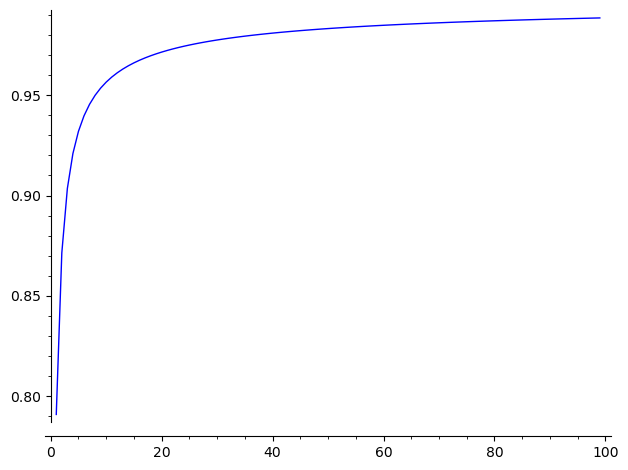

In [14]:
# Here we plot the ratio of the EGF coefficients to the predicted asymtptotic behaviour
line([[k,coeffs[k]/asm.subs(n=k)] for k in range(1,100)])

### Example 3.19 - involutions

In [15]:
var('n')
F = exp(z + z^2/2)
coeffs = list(F.series(z,100).truncate().polynomial(QQ))
asm = n^(n/2)*exp(sqrt(n)-n/2)/sqrt(2*exp(1/2))
print("We have shown in the book that")
show("[z^n]", SR("exp(z + z^2/2)"), " ~ \t", asm)

We have shown in the book that


'[z^n]' e^(1/2*z^2 + z) ' ~ \t' 1/2*sqrt(2)*n^(1/2*n)*e^(-1/2*n + sqrt(n) - 1/4)

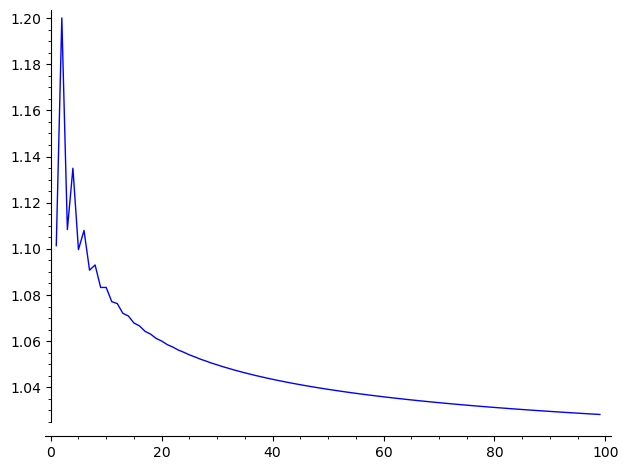

In [16]:
# Here we plot the ratio of the EGF coefficients to the predicted asymtptotic behaviour
line([[k,factorial(k)*coeffs[k]/asm.subs(n=k)] for k in range(1,100)])